# Creating Train data set

In [19]:
#importing required libraries

import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from os import listdir
import matplotlib.pyplot as plt
import heapq

In [2]:
#converting json files to pandas dataframe 

question_file_path = 'v2_OpenEnded_mscoco_train2014_questions.json'
annotation_file_path = 'v2_mscoco_train2014_annotations.json'

with open(question_file_path, 'r') as f:
    questions = json.load(f)

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    
print("Total no. of question are",len(questions['questions']))
print("Total no. of answers are",len(annotations['annotations']))

Total no. of question are 443757
Total no. of answers are 443757


In [3]:
#questions df

que = questions['questions']
questions_df = pd.DataFrame(que)
questions_df

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000
...,...,...,...
443752,524286,What color is the keyboard?,524286001
443753,524286,Is there a computer mouse on the desk?,524286002
443754,524286,What color is the computer?,524286003
443755,524286,Why are there two keyboards?,524286004


In [10]:
#answers df

annot = annotations['annotations']
annotations_df = pd.DataFrame(annot)
annotations_df

,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",458752,other,458752000
1,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",458752,other,458752001
2,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",458752,other,458752002
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",458752,yes/no,458752003
4,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",262146,other,262146000
...,...,...,...,...,...,...
443752,what color is the,black,"[{'answer': 'black', 'answer_confidence': 'yes...",524286,other,524286001
443753,is there a,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",524286,yes/no,524286002
443754,what color is the,black,"[{'answer': 'black', 'answer_confidence': 'yes...",524286,other,524286003
443755,why,one is easier to type on,"[{'answer': 'don't know', 'answer_confidence':...",524286,other,524286004


In [9]:
#total number of images

image_dir = 'train2014'
images= listdir(image_dir)
len(images)

165358

In [11]:
subtype='train2014'
data=[]
imdir='%s/COCO_%s_%012d.jpg'
for i in tqdm(range(len(annotations['annotations']))):
    answ=annotations['annotations'][i]['multiple_choice_answer']
    im_path=imdir%(subtype,subtype,annotations['annotations'][i]['image_id'])
    ques=questions['questions'][i]['question']
    data.append({'im_path':im_path,'question':ques,'answer':answ})
total_data=pd.DataFrame(data)

total_data

100%|██████████████████████████████████████████████████████████████████████| 443757/443757 [00:00<00:00, 623328.61it/s]


,im_path,question,answer
0,train2014/COCO_train2014_000000458752.jpg,What is this photo taken looking through?,net
1,train2014/COCO_train2014_000000458752.jpg,What position is this man playing?,pitcher
2,train2014/COCO_train2014_000000458752.jpg,What color is the players shirt?,orange
3,train2014/COCO_train2014_000000458752.jpg,Is this man a professional baseball player?,yes
4,train2014/COCO_train2014_000000262146.jpg,What color is the snow?,white
...,...,...,...
443752,train2014/COCO_train2014_000000524286.jpg,What color is the keyboard?,black
443753,train2014/COCO_train2014_000000524286.jpg,Is there a computer mouse on the desk?,no
443754,train2014/COCO_train2014_000000524286.jpg,What color is the computer?,black
443755,train2014/COCO_train2014_000000524286.jpg,Why are there two keyboards?,one is easier to type on


In [12]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not",
"couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he's": "he is","how'd": "how did",
"how'll": "how will","how's": "how is","i'd": "i would","i'll": "i will","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'll": "it will","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"must've": "must have","mustn't": "must not","needn't": "need not","oughtn't": "ought not","shan't": "shall not","sha'n't": "shall not","she'd": "she would",
"she'll": "she will","she's": "she is","should've": "should have","shouldn't": "should not","that'd": "that would","that's": "that is","there'd": "there had",
"there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","wasn't": "was not","we'd": "we would",
"we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what're": "what are","what's": "what is",
"what've": "what have","where'd": "where did","where's": "where is","who'll": "who will","who's": "who is","won't": "will not","wouldn't": "would not",
"you'd": "you would","you'll": "you will","you're": "you are"
}

def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = ""
    text = text.lower()
    i = 0
    for word in text.split():
        if i==0:
            new_text = contractions.get(word,word)
        else:
            new_text = new_text + " " + contractions.get(word,word)
        i += 1
    return new_text.replace("'s", '')

total_data['answer'] = total_data['answer'].apply(lambda x: preprocess_english(x))
total_data['question'] = total_data['question'].apply(lambda x: preprocess_english(x))
total_data

,im_path,question,answer
0,train2014/COCO_train2014_000000458752.jpg,what is this photo taken looking through?,net
1,train2014/COCO_train2014_000000458752.jpg,what position is this man playing?,pitcher
2,train2014/COCO_train2014_000000458752.jpg,what color is the players shirt?,orange
3,train2014/COCO_train2014_000000458752.jpg,is this man a professional baseball player?,yes
4,train2014/COCO_train2014_000000262146.jpg,what color is the snow?,white
...,...,...,...
443752,train2014/COCO_train2014_000000524286.jpg,what color is the keyboard?,black
443753,train2014/COCO_train2014_000000524286.jpg,is there a computer mouse on the desk?,no
443754,train2014/COCO_train2014_000000524286.jpg,what color is the computer?,black
443755,train2014/COCO_train2014_000000524286.jpg,why are there two keyboards?,one is easier to type on


In [33]:
total_data['answer'].value_counts()

yes                         84978
no                          82516
1                           12540
2                           12215
white                        8916
                            ...  
turistico                       1
selling them                    1
flathead                        1
to row                          1
one is easier to type on        1
Name: answer, Length: 22450, dtype: int64

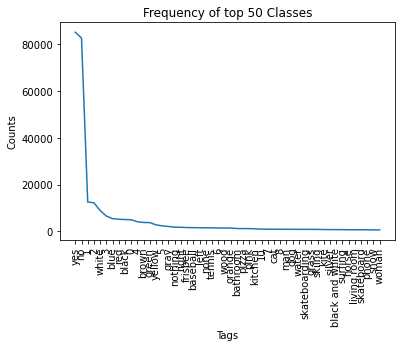

In [16]:
all_classes = total_data['answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1

sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

plt.plot([x[1] for x in sort_class_frequency[:50]])
i=np.arange(50)
plt.title("Frequency of top 50 Classes")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,[x[0] for x in sort_class_frequency[:50]])
plt.xticks(rotation=90)
plt.show()

In [17]:
cnt1= total_data[total_data['answer']=='yes']['answer'].count()+total_data[total_data['answer']=='no']['answer'].count()
cnt2= len(total_data)-cnt1
print("Total no of answers                 :",len(total_data))
print("Total no of binary(yes/no) answers  :",cnt1)
print("% of binary answers                 :",np.round(cnt1/len(total_data)*100,2))
print("Total no of multiple answers        :",cnt2)
print("% of multiple answers               :",np.round(cnt2/len(total_data)*100,2))

Total no of answers                 : 443757
Total no of binary(yes/no) answers  : 167494
% of binary answers                 : 37.74
Total no of multiple answers        : 276263
% of multiple answers               : 62.26


In [20]:
common_tags = heapq.nlargest(1000, class_frequency, key = class_frequency.get)
#common_tags
total_data['answer'] =  total_data['answer'].apply(lambda x: x if x in common_tags else '')
data = total_data[total_data['answer'].apply(lambda x: len(x)>0)]
data

,im_path,question,answer
0,train2014/COCO_train2014_000000458752.jpg,what is this photo taken looking through?,net
1,train2014/COCO_train2014_000000458752.jpg,what position is this man playing?,pitcher
2,train2014/COCO_train2014_000000458752.jpg,what color is the players shirt?,orange
3,train2014/COCO_train2014_000000458752.jpg,is this man a professional baseball player?,yes
4,train2014/COCO_train2014_000000262146.jpg,what color is the snow?,white
...,...,...,...
443751,train2014/COCO_train2014_000000524286.jpg,how many keyboards are there?,2
443752,train2014/COCO_train2014_000000524286.jpg,what color is the keyboard?,black
443753,train2014/COCO_train2014_000000524286.jpg,is there a computer mouse on the desk?,no
443754,train2014/COCO_train2014_000000524286.jpg,what color is the computer?,black


In [11]:
data.to_csv('train_data.csv')